In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [5]:
employee = pd.read_csv('employee_retention_data.csv', parse_dates = ['join_date', 'quit_date'])

In [6]:
employee.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [8]:
employee.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

# Estimate of headcount each day from 2011/1/24 to 2015/12/13

In [12]:
unique_date = pd.date_range(start='2011-01-24', end='2015-12-13', freq='D')
unique_company = sorted(employee['company_id'].unique())

In [37]:
days = []
company = []
headcount = []

for date in unique_date:
    for comp in unique_company:
        total_join = len( employee[(employee['join_date'] <= date) & (employee['company_id'] == comp)] )
        total_quit = len( employee[(employee['quit_date'] <= date) & (employee['company_id'] == comp)] )
        temp_headcount = total_join - total_quit
        
        days.append(date)
        company.append(comp)
        headcount.append(temp_headcount)
        
table = pd.DataFrame({'day': days, 'company_id': company, 'employee_headcount': headcount}, 
                     columns=['day', 'company_id', 'employee_headcount'])

table.head()

,day,company_id,employee_headcount
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5


# Employee Churn Analysis

In [39]:
employee_quit = employee[~employee['quit_date'].isnull()]
employee_quit

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22
5,509529.0,4,data_science,14,165000.0,2012-01-30,2013-08-30
...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09


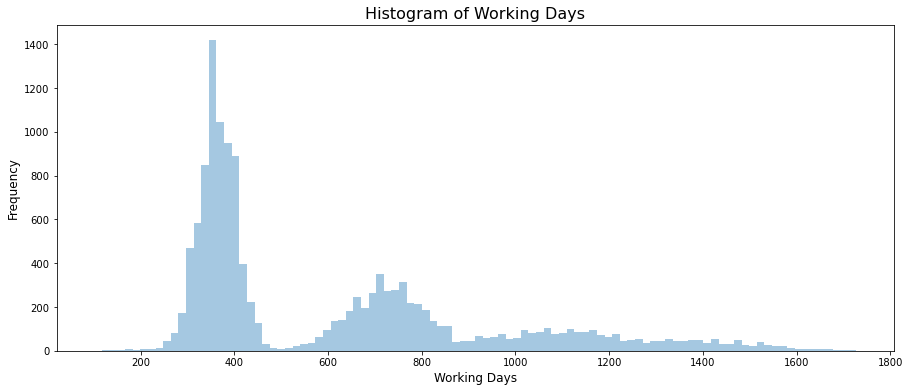

In [66]:
# Total working days
work_days = np.array(list(map(lambda x: x.days, employee_quit['quit_date'] - employee_quit['join_date'])))

fig, ax = plt.subplots(figsize=(15, 6))
sns.distplot(work_days, bins=100, kde=False, ax=ax)
ax.set_title('Histogram of Working Days', fontsize=16)
ax.set_xlabel('Working Days', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

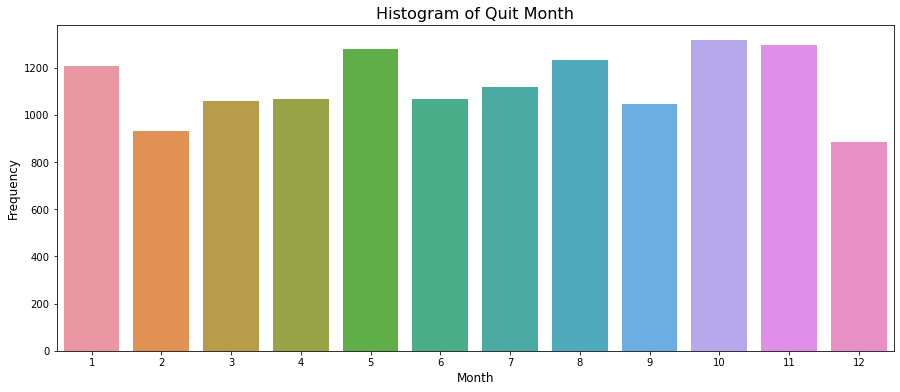

In [69]:
quit_month = np.array(list(map(lambda x: x.month, employee_quit['quit_date'])))

fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(quit_month, ax=ax)
ax.set_title('Histogram of Quit Month', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [75]:
employee['quit'] = np.where(employee['quit_date'].isnull(),0, 1)

employee

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,1
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1
...,...,...,...,...,...,...,...,...
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaT,0
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaT,0
24699,777612.0,4,customer_service,11,67000.0,2013-09-03,2015-10-23,1
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1


In [78]:
le = LabelEncoder()
train_x = employee[['company_id', 'salary', 'seniority']]
train_x['dept'] = le.fit_transform(employee['dept'])
train_y = employee['quit'].values

train_x.head()

<ipython-input-78-f730cb3bc943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['dept'] = le.fit_transform(employee['dept'])


,company_id,salary,seniority,dept
0,7,89000.0,28,0
1,7,183000.0,20,4
2,4,101000.0,14,4
3,7,115000.0,20,0
4,2,276000.0,23,1


In [79]:
# Build decision tree
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=42)
clf = clf.fit(X=train_x, y=train_y)

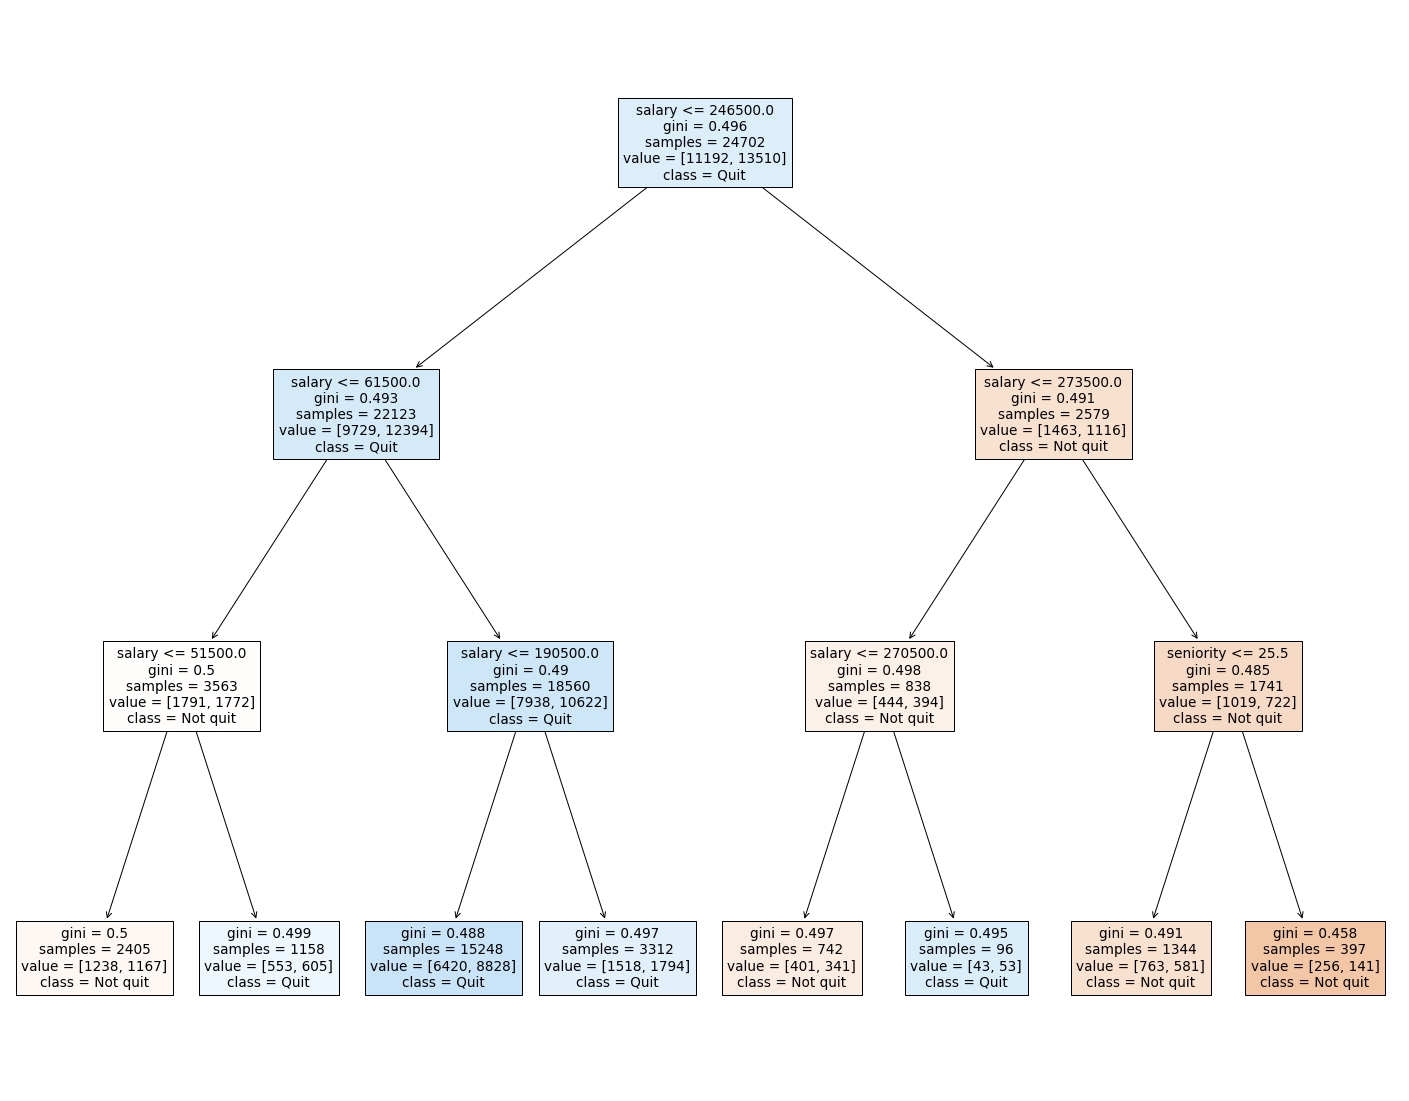

In [81]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features,  
                   class_names=targets,
                   filled=True)

In [90]:
features = list(train_x.columns)
importances = clf.feature_importances_

print(list(zip(features, importances)))

[('company_id', 0.0), ('salary', 0.9712942431235726), ('seniority', 0.028705756876427322), ('dept', 0.0)]


# Salary is the most important factors of job churn

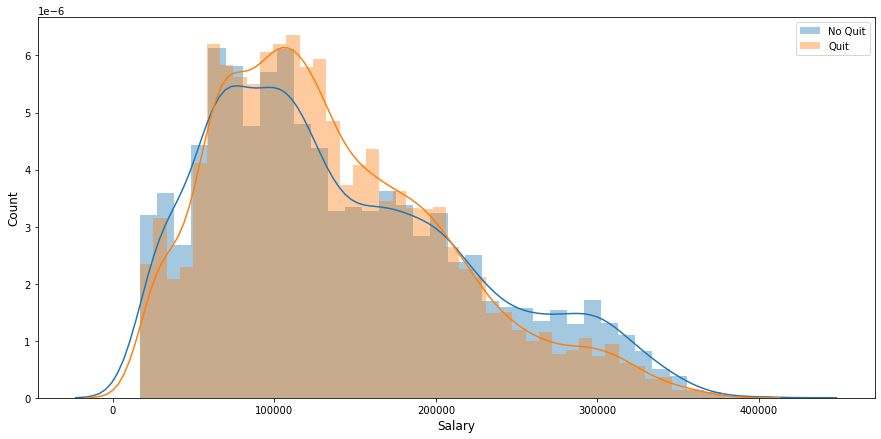

In [93]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(employee[employee['quit']==0]['salary'], 
             label='No Quit', ax=ax)
sns.distplot(employee[employee['quit']==1]['salary'], 
             label='Quit', ax=ax)
ax.set_xlabel('Salary', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.legend()
plt.show()

# Findings:
   1. most employee quit after 400 years(approx: 1 year) of getting the job
   2. salary is the most important factors of quitting jobs, and employee that has low and high salarys are less likely to quit the job
   3. One variable I would like to add to this data, would be if the employees quit, what is the salary for his next job be?